# Imports & setup

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import geopandas as gpd
import geoplot as gplt
import sddk
import warnings
warnings.simplefilter(action='ignore')# , category=FutureWarning)
from numpy import int64
import plotly

In [3]:
# global parameters for plots
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"

In [85]:
s = sddk.cloudSession("sciencedata.dk", "SDAM_root", "648597@au.dk")

connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


# Import datasets

In [5]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions_merged = gpd.GeoSeries(pleiades_regions.unary_union)

In [6]:
# import the datasets...
PHI = pd.read_json("../data/large_data/PHI_v1.0.json")
iphi = pd.read_json("../data/large_data/iphi.json")

In [7]:
PHI = PHI.merge(iphi.rename(columns={"id":"PHI_ID"}), on="PHI_ID", how="outer")

In [8]:
PHI.head(5)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς ...,2.0,"[[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν,...","[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν, ...",485/4 a.,"{'or': None, 'not_before': -485, 'not_after': ...",-485.0,-484.0,None,[range],None,None,[--------------------------------------] [----...,Att. — stoich. 38 — 485/4 a.,1701.0,Attica (IG I-III),1700.0,Attica,485/4 a.,-485.0,

# Merge with TM TextRelation data (i.e. IDs from various projects...)

In [9]:
# trismegistos text relations dataset
PHI_TM_merged = s.read_file("SDAM_data/PHI/PHI_TM_merged.csv")

In [10]:
to_keep = []
for col in PHI_TM_merged.columns:
    length_vals = len([el for el in PHI_TM_merged[col] if "[" in str(el)])
    if length_vals >= 1000:
        to_keep.append(col)
        print(col, length_vals)

TM_ID 218104
EDH 8472
EDCS 23929
EDR 3761
PHI 217863
LUPA 1129
ISic 2465
IG 8147
atticinscriptions 4156
Attalus 2235


In [11]:
PHI_TM_merged = PHI_TM_merged[to_keep]
PHI_TM_merged.head(10)

,TM_ID,EDH,EDCS,EDR,PHI,LUPA,ISic,IG,atticinscriptions,Attalus
0,['786251'],NaN,NaN,NaN,['1'],NaN,NaN,['IG I³ 1'],['1672'],NaN
1,['786252'],NaN,NaN,NaN,['2'],NaN,NaN,['IG I³ 2'],['1707'],NaN
2,['786253'],NaN,NaN,NaN,['3'],NaN,NaN,['IG I³ 3'],['ii-1b'],NaN
3,['786254'],NaN,NaN,NaN,['4'],NaN,NaN,"['IG I³ 4(A)', 'IG I³ 4(B)']",['1692'],NaN
4,['786255'],NaN,NaN,NaN,['5'],NaN,NaN,['IG I³ 5'],['1284'],NaN
5,['786256'],NaN,NaN,NaN,['6'],NaN,NaN,['IG I³ 6'],['6'],NaN
6,['786257'],NaN,NaN,NaN,['7'],NaN,NaN,['IG I³ 7'],['108'],NaN
7,['786258'],NaN,NaN,NaN,['8'],NaN,NaN,['IG I³ 8'],['8'],NaN
8,['786259'],NaN,NaN,NaN,['9'],NaN,NaN,['IG I³ 9'],['9'],NaN
9,['786260'],NaN,NaN,NaN,['10'],NaN,NaN,['IG I³ 10'],['120'],NaN


In [12]:
def try_eval(val):
  if not isinstance(val, list):
    try:
      val = eval(val)
    except:
      val = None
  return val

In [13]:
for col in PHI_TM_merged.columns:
    PHI_TM_merged[col] = PHI_TM_merged[col].apply(try_eval)

In [14]:
for col in PHI_TM_merged.columns:
    if "ID" not in col:
        PHI_TM_merged.rename(columns={col : col + "_ID"}, inplace=True)

In [15]:
def get_first_id(val):
    try:
        return int64(val[0])
    except:
        return val

PHI_TM_merged["PHI_ID"] = PHI_TM_merged["PHI_ID"].apply(get_first_id)

In [16]:
PHI_TM_merged.head(5)

,TM_ID,EDH_ID,EDCS_ID,EDR_ID,PHI_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID
0,[786251],None,None,None,1.0,None,None,[IG I³ 1],[1672],None
1,[786252],None,None,None,2.0,None,None,[IG I³ 2],[1707],None
2,[786253],None,None,None,3.0,None,None,[IG I³ 3],[ii-1b],None
3,[786254],None,None,None,4.0,None,None,"[IG I³ 4(A), IG I³ 4(B)]",[1692],None
4,[786255],None,None,None,5.0,None,None,[IG I³ 5],[1284],None


In [17]:
PHI = PHI.merge(PHI_TM_merged, on="PHI_ID")

In [18]:
PHI.head(5)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς ...,2.0,"[[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν,...","[τὶς, φρορὰν, πεντέκοντα, δραχμή

# Map TMgeo IDs on PHI using TM IDs

In [19]:
TM_TMgeo_dict = s.read_file("SDAM_data/PHI/TM_TMgeo_dict.json", "dict")

In [20]:
PHI["TMgeo_ID"] = PHI["TM_ID"].apply(lambda x: TM_TMgeo_dict[str(x[0])])

In [21]:
PHI.head(5)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364]
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373]
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373]
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς ...,2.0,"[[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν,...","[τὶς,

In [22]:
# how many unique places we have in PHI?
len(PHI["TMgeo_ID"].apply(lambda x: x[0]).unique())

9163

# Load dump of Trismegistos places

In [23]:
export_geo = pd.read_csv("../data/large_data/export_geo.csv")
export_geo.head(10)

,id,country,name_standard,begin_date,end_date,coordinates;
0,1,ghost name,A[..]....,0,0,;
1,2,Egypt,A.[ ],-228,-227,;
2,3,Egypt,A.[ ],164,164,;
3,4,Egypt,Aalabin Topos,700,725,;
4,5,Egypt,Aanemooch Topos,700,725,;
5,6,Egypt,Ab[ ] Epoikion,130,160,;
6,7,Egypt,Ab( ) Chorion,600,799,;
7,8,ghost name,Abak( ),0,0,;
8,9,Egypt,Abaktou Topos,524,725,;
9,10,Sudan,Abale,77,77,"17.682319,33.975361;"


In [24]:
len(export_geo)

60677

In [25]:
export_geo = export_geo[export_geo["coordinates;"].str.contains(",")].copy()
export_geo.head(5)

,id,country,name_standard,begin_date,end_date,coordinates;
9,10,Sudan,Abale,77,77,"17.682319,33.975361;"
12,13,Egypt,Abaton,-399,499,"24.041393,32.897895;"
13,14,Greece,Abdera,900,999,"40.95,24.983333;"
30,31,Egypt,Abu el-Matamir,0,0,"30.908411,30.148487;"
32,33,Egypt,Amouda,77,77,"22.33644375,31.62656425;"


In [26]:
export_geo["y_lat"] = export_geo["coordinates;"].apply(lambda x: float(x.partition(",")[0].replace(";","")))
export_geo["x_long"] = export_geo["coordinates;"].apply(lambda x: float(x.partition(",")[2].replace(";","")))


In [27]:
TM_geo = gpd.GeoDataFrame(export_geo, geometry=gpd.points_from_xy(export_geo["x_long"], export_geo["y_lat"]))

In [28]:
#TM_geo = gpd.read_file("../data/large_data/TM_geo.json", driver="GeoJSON")
TM_geo.head(5)

,id,country,name_standard,begin_date,end_date,coordinates;,y_lat,x_long,geometry
9,10,Sudan,Abale,77,77,"17.682319,33.975361;",17.682319,33.975361,POINT (33.97536 17.68232)
12,13,Egypt,Abaton,-399,499,"24.041393,32.897895;",24.041393,32.897895,POINT (32.89789 24.04139)
13,14,Greece,Abdera,900,999,"40.95,24.983333;",40.950000,24.983333,POINT (24.98333 40.95000)
30,31,Egypt,Abu el-Matamir,0,0,"30.908411,30.148487;",30.908411,30.148487,POINT (30.14849 30.90841)
32,33,Egypt,Amouda,77,77,"22.33644375,31.62656425;",22.336444,31.626564,POINT (31.62656 22.33644)


In [29]:
len(TM_geo)

22997

<AxesSubplot:>

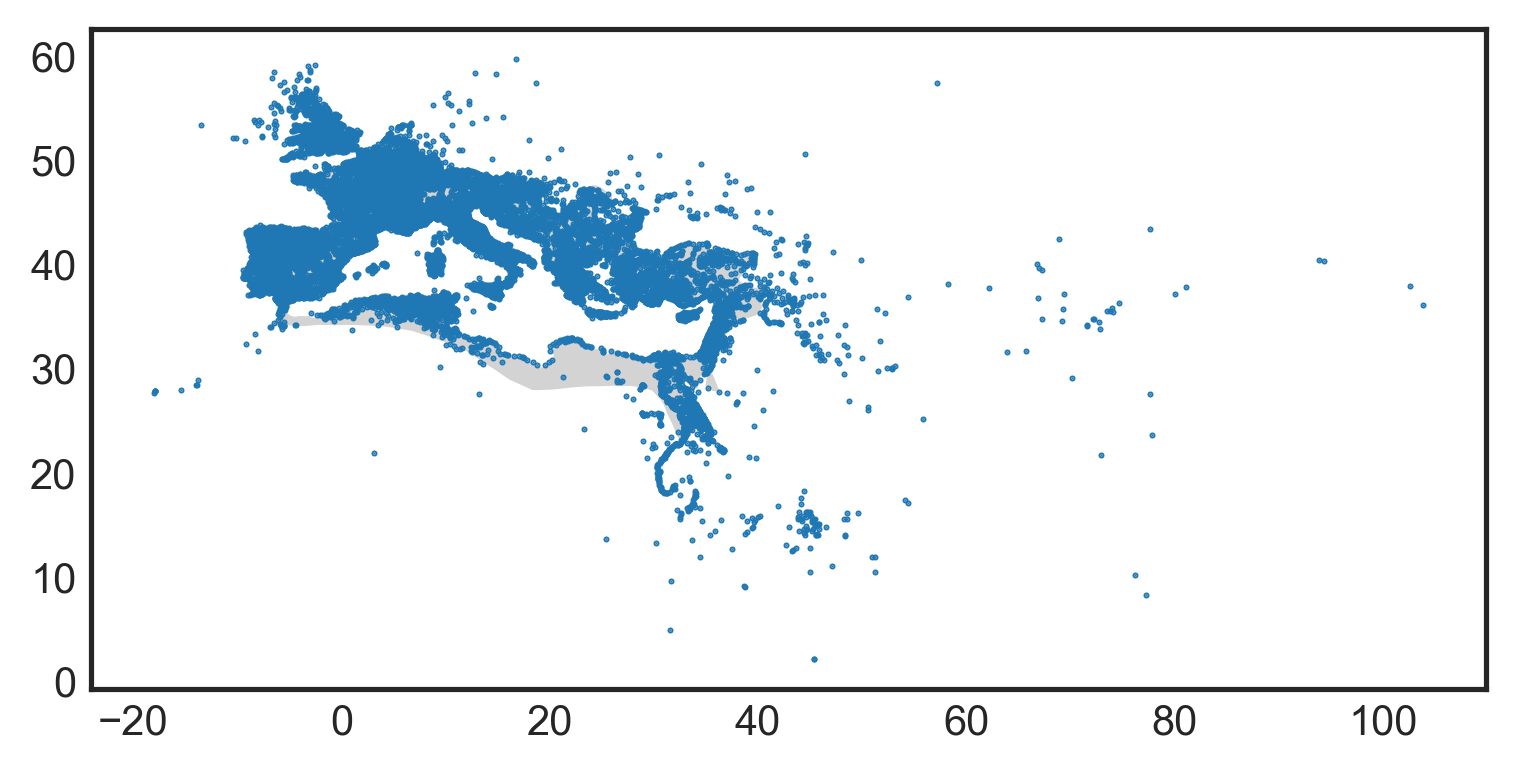

In [30]:
fig, ax = plt.subplots(dpi=300)
pleiades_regions_merged.plot(ax=ax, color="lightgrey")
TM_geo.plot(ax=ax, markersize=0.2)

In [31]:
dict_xlong = dict(zip(export_geo["id"].astype(str), export_geo["x_long"]))
dict_ylat = dict(zip(export_geo["id"].astype(str), export_geo["y_lat"]))
dict_name = dict(zip(export_geo["id"].astype(str), export_geo["name_standard"]))

In [32]:
def geocode(tmgeoid_list, datadict):
    id = str(tmgeoid_list[0])
    val = None
    if id in datadict.keys():
        val = datadict[id]
    return val

In [33]:
PHI["x_long"] = PHI["TMgeo_ID"].apply(lambda x: geocode(x, dict_xlong))
PHI["y_lat"] = PHI["TMgeo_ID"].apply(lambda x: geocode(x, dict_ylat))
PHI["TMgeo_name"] = PHI["TMgeo_ID"].apply(lambda x: geocode(x, dict_name))

In [34]:
PHI.head(20)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364],23.723985,37.972747,Athenai
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκο

In [35]:
len(PHI)

217863

In [36]:
len([el for sublist in PHI["TM_ID"].tolist() for el in sublist])

217863

In [37]:
len(set([el for sublist in PHI["TM_ID"].tolist() for el in sublist]))

192114

In [38]:
PHI

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364],23.723985,37.972747,Athenai
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,[ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκο

In [39]:
tm_ids_iphi = [el for sublist in PHI[PHI["text"].notnull()]["TM_ID"] for el in sublist]
tm_ids_petra = [el for sublist in PHI[PHI["text"].isnull()]["TM_ID"] for el in sublist]

In [40]:
len(set(tm_ids_iphi) & set(tm_ids_petra))

2450

# Not geocoded yet

In [41]:
len(PHI[PHI["x_long"].isnull()])

37802

### not geocoded but in other databases

In [42]:
PHI[(PHI["x_long"].isnull()) & (PHI["EDCS_ID"].notnull())]

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name
8764,/text/9162?location=1700&patt=&bookid=5&offset...,IG II²,6810,Regions\nAttica (IG I-III)\nAttica,IG II²\n6810,Att. — aet. imp.,,1.0,1,Κλαυδία Πυραλλὼ Μαραθωνία.,IG-II².csv,9162,Κλαυδία Πυραλλὼ Μαραθωνία.,Κλαυδία Πυραλλὼ Μαραθωνία,Κλαυδία Πυραλλὼ Μαραθωνία,Κλαυδία Πυραλλὼ Μαραθωνία.,Κλαυδία Πυραλλὼ Μαραθωνία.,[Κλαυδία Πυραλλὼ Μαραθωνία.],1.0,"[[Κλαυδία, πυραλλὼ, μαραθωνία]]","[Κλαυδία, πυραλλὼ, μαραθωνία]",aet. imp.,"{'or': None, 'source': 'PeriodO', 'notes': Non...",-31.0,410.0,None,"[range, period]",None,http://n2t.net/ark:/99152/p08m57hqcc5,κλαυδια πυραλλω μαραθωνια.,Att. — aet. imp.,1701.0,Attica (IG I-III),1700.0,Attica,aet. imp.,-27.0,284.0,0.0,[695656],None,[33600269],None,None,None,None,None,None,[373],NaN,NaN,None
9990,/text/10388?location=1700&patt=&bookid=5&offse...,IG II²,8003,Regions\nAttica (IG I-III)\nAttica,IG II²\n8003,Att. — s. II/III p.,,3.0,1\n\n,[Ἀ]μμώνιε Ἡφαιστίω-\nνος Ἀλεξανδρεῦ\nχρηστὲ χα...,IG-II².csv,10388,[Ἀ]μμώνιε Ἡφαιστίω-\nνος Ἀλεξανδρεῦ\nχρηστὲ χα...,μμώνιε Ἡφαιστίωνος Ἀλεξανδρεῦ χρηστὲ χαῖρε,Ἀμμώνιε Ἡφαιστίωνος Ἀλεξανδρεῦ χρηστὲ χαῖρε,Ἀμμώνιε Ἡφαιστίωνος Ἀλεξανδρεῦ χρηστὲ χαῖρε.,Ἀμμώνιε Ἡφαιστίωνος Ἀλεξανδρεῦ χρηστὲ χαῖρε.,[Ἀμμώνιε Ἡφαιστίωνος Ἀλεξανδρεῦ χρηστὲ χαῖρε.],1.0,"[[ἀμμώνιε, ἡφαιστίωνος, ἀλεξανδρεῦ, χρηστός, χ...","[ἀμμώνιε, ἡφαιστίωνος, ἀλεξανδρεῦ, χρηστός, χα...",s. II/III p.,"{'or': None, 'not_before': 101, 'not_after': 3...",101.0,300.0,None,"[range, cent, morece]",None,None,[α]μμωνιε ηφαιστιωνος αλεξανδρευ χρηστε χαιρε.,Att. — s. II/III p.,1701.0,Attica (IG I-III),1700.0,Attica,s. II/III p.,NaN,NaN,NaN,[692946],None,[39200759],None,None,None,None,None,None,[19860],NaN,NaN,None
15308,/text/15706?location=1700&patt=&bookid=5&offse...,IG II²,13217,Regions\nAttica (IG I-III)\nAttica,IG II²\n13217,Att. — s. II/III p.,,9.0,1\n\n\n\n5\n\n\n\n,Μουκία Ἐπίκτη-\nσις Ποτιολανῷ\nἰδίῳ ἀνδρὶ καὶ\...,IG-II².csv,15706,Μουκία Ἐπίκτη-\nσις Ποτιολανῷ\nἰδίῳ ἀνδρὶ καὶ\...,Μουκία Ἐπίκτησις Ποτιολανῷ ἰδίῳ ἀνδρὶ καὶ ἑαυτ...,Μουκία Ἐπίκτησις Ποτιολανῷ ἰδίῳ ἀνδρὶ καὶ ἑαυτ...,Μουκία Ἐπίκτησις Ποτιολανῷ ἰδίῳ ἀνδρὶ καὶ ἑαυτ...,Μουκία Ἐπίκτησις Ποτιολανῷ ἰδίῳ ἀνδρὶ καὶ ἑαυτ...,[Μουκία Ἐπίκτησις Ποτιολανῷ ἰδίῳ ἀνδρὶ καὶ ἑαυ...,2.0,"[[μουκία, ἐπίκτησις, ποτιολανῷ, ἴδιος, ἀνήρ, κ...","[μουκία, ἐπίκτησις, ποτιολανῷ, ἴδιος, ἀνήρ, κα...",s. II/III p.,"{'or': None, 'not_before': 101, 'not_after': 3...",101.0,300.0,None,"[range, cent, morece]",None,None,μουκια επικτησις ποτιολανω ιδιω ανδρι και εαυτ...,Att. — s. II/III p.,1701.0,Attica (IG I-III),1700.0,Attica,s. II/III p.,NaN,NaN,NaN,[636448],None,[39101171],None,None,None,None,None,None,[373],NaN,NaN,None
15561,/text/27698?location=1690&patt=&bookid=6&offse...,IG IV,202,Regions\nPeloponnesos (IG IV-[VI]),IG IV\n202,Korinthia — Isthmos — 2nd c. AD — IG XIV 2543,,4.0,1\n\n\n,Π(όπλιος) Λικίνιος {²⁷Λικίννιος (Huebner)}²⁷\n...,IG-IV.csv,27698,Π(όπλιος) Λικίνιος {²⁷Λικίννιος (Huebner)}²⁷\n...,Π Λικίνιος Πρεῖσκος ἱερεὺς ΙC,Πόπλιος Λικίννιος Huebner Πρεῖσκος ἱερεὺς ΙC,Πόπλιος Λικίννιος Huebner Πρεῖσκος ἱερεὺς ΙC,Πόπλιος Λικίννιος Huebner Πρεῖσκος ἱερεὺς ΙC,[Πόπλιος Λικίννιος Huebner Πρεῖσκος ἱερεὺς ΙC],1.0,"[[Πόπλιος, λικίννιος, huebner, πρεῖσκος, ἱερεύς]]","[Πόπλιος, λικίννιος, huebner, πρεῖσκος, ἱερεύς]",2nd c. AD,"{'or': None, 'not_before': 101, 'not_after': 2...",101.0,200.0,None,"[range, cent]",None,None,ποπλιος λικινιος πρεισκος ιερευς [--].,Korinthia — Isthmos — 2nd c. AD — IG XIV 2543,1690.0,Peloponnesos (IG IV-[VI]),1667.0,"Saronic Gulf, Corinthia, and 

In [43]:
PHI[(PHI["x_long"].isnull()) & (PHI["atticinscriptions_ID"].notnull())]


,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None
6,/text/7?location=1701&patt=&bookid=4&offset=0&...,IG I³,7,Regions\nAttica (IG I-III),IG I³\n7,Att. — stoich. 40 — 460-450,,28.0,frg. a.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n13\n\n\nf...,[ἔδοχσεν τε͂]ι βο[λ]ε͂[ι καὶ το͂ι δέμοι· ․․6․․...,IG-I³.csv,7,[ἔδοχσεν τε]ι βο[λ]ε[ι καὶ τοι δέμοι ------ ἐπ...,ι βοε͂ς ἐγραμμ ρὶ ὁ͂ν δέοεο͂ καὶ τὰ πρόαντας ...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ἐπρυτάνευε ...,"ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ἐπρυτάνευε,...",ἔδοχσεν τει βολει καὶ τοι δέμοι ἐπρυτάνευε ς ἐ...,[ἔδοχσεν τει βολει καὶ τοι δέμοι ἐπρυτάνευε ς ...,1.0,"[[ἔδοχσεν, τει, βολει, δέμοι, πρυτανεύω, γραμμ...","[ἔδοχσεν, τει, βολει, δέμοι, πρυτανεύω, γραμμα...",460-450,"{'or': None, 'not_before': -460, 'not_after': ...",-460.0,-450.0,None,[range],None,None,[εδοχσεν τε]ι βο[λ]ε[ι και τοι δεμοι ------ επ...,Att. — stoich. 40 — 460-450,1701.0,Attica (IG I-III),1700.0,Attica,,NaN,NaN,NaN,[786257],None,None,None,None,None,[IG I³ 7],[108],None,[373],NaN,NaN,None
7,/text/8?location=1701&patt=&bookid=4&offset=0&...,IG I³,8,Regions\nAttica (IG I-III),IG I³\n8,Att. — stoich. 32 — 460-450,,26.0,frg. a.1\n\n\n\n5\n\n\n\n\n10\n\n\nfrg. b.12\n...,[․․5․․]#⁷ον ℎὰ ο[․․․․․․․․․21․․․․․․․․․․]\nα περ...,IG-I³.csv,8,[-----] ον ἃ ο[---------------------] α περὶ τ...,ον ℎὰ ο α περὶ τούτον μον Ἀντίβιορ Καλλίμαχος ...,ον ℎὰ ο α περὶ τούτον δε͂μον Ἀντίβιος εἶπεν τὰ...,ον ℎὰ ο α περὶ τούτον δε͂μον ⋮⋮ Ἀντίβιος εἶπεν...,ον ἃ ο α περὶ τούτον δεμον ἀντίβιος εἶπεν τὰ μ...,[ον ἃ ο α περὶ τούτον δεμον ἀντίβιος εἶπεν τὰ ...,1.0,"[[οὗτος, δέμω, ἀντίβιος, λέγω, ἄλλος, Καλλίμαχ...","[

In [44]:
PHI = gpd.GeoDataFrame(PHI, geometry=gpd.points_from_xy(PHI["x_long"], PHI["y_lat"]))

(22.0, 55.5)

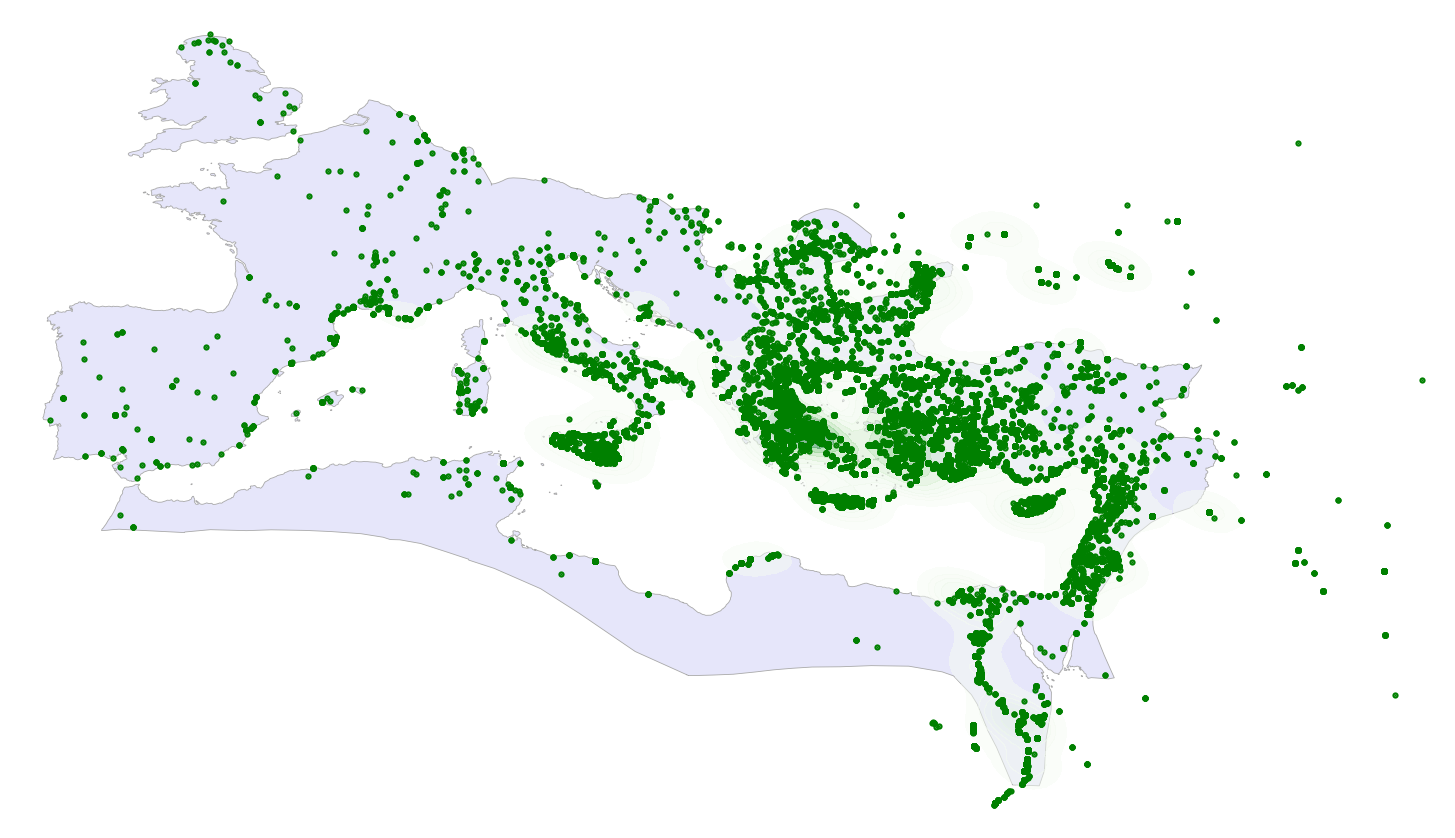

In [48]:
fig, ax = plt.subplots()
pleiades_regions_merged.plot(ax=ax, edgecolor="darkgrey" , linewidth=0.2, color="lavender")
gplt.kdeplot(PHI[PHI["x_long"].notnull()], cmap=plt.get_cmap("Greens"), ax=ax, alpha=0.5, shade=True, zorder=2)
PHI.plot(ax=ax, marker=".", markersize=1, color="green", zorder=3)
ax.set_axis_off()
ax.set_xlim(-10, 50)
ax.set_ylim(22, 55.5)
#ax.set_title("PHI" + " (N={0})".format(str(len(subset))))

In [56]:
LIRE = gpd.read_file("/Users/kasev//Projects/LIRE_ETL/data/large_data/LIRE_v1-2.geojson", driver="GeoJSON")

(22.0, 55.5)

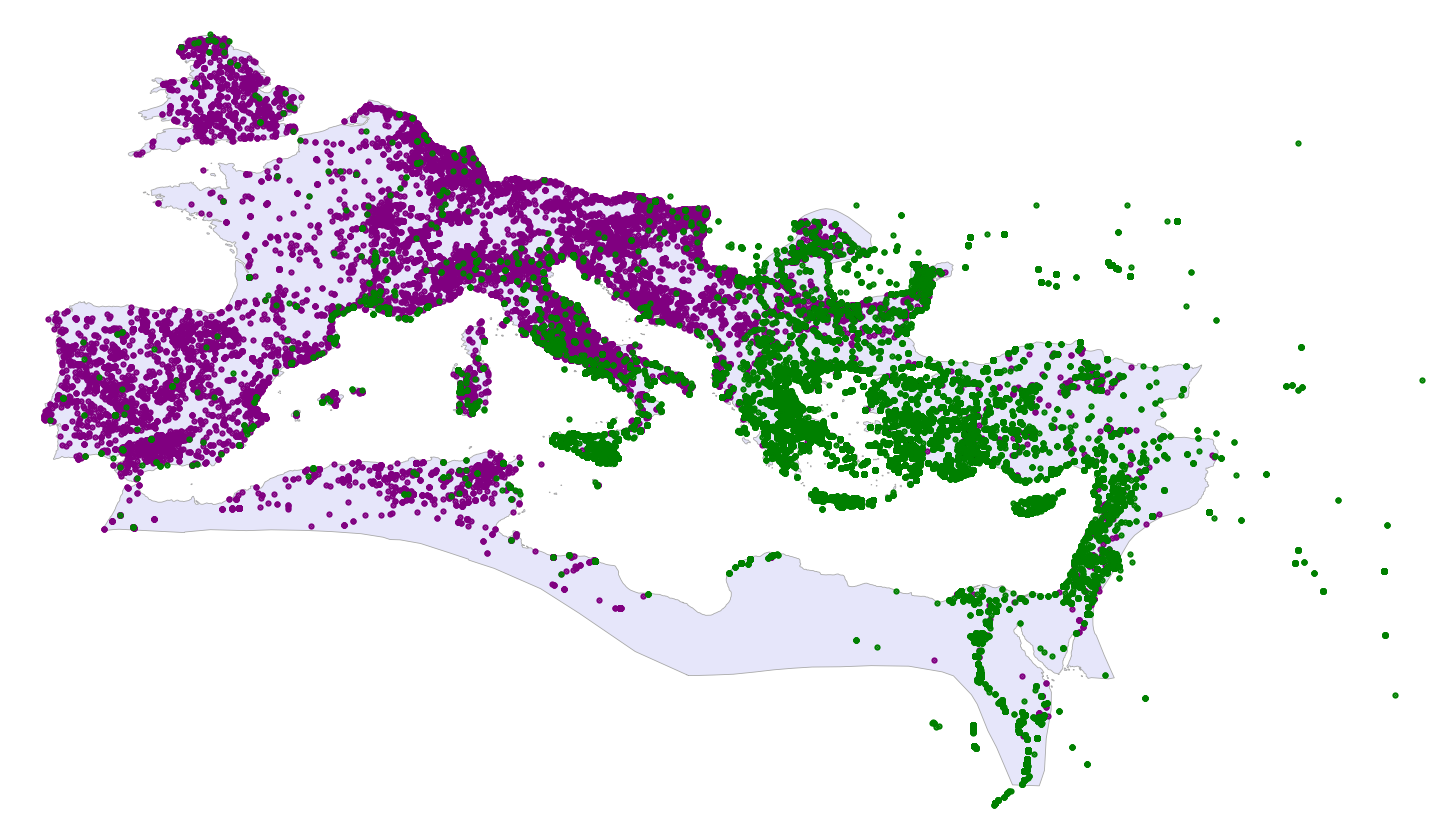

In [57]:
fig, ax = plt.subplots()
pleiades_regions_merged.plot(ax=ax, edgecolor="darkgrey" , linewidth=0.2, color="lavender")
#gplt.kdeplot(PHI[PHI["x_long"].notnull()], cmap=plt.get_cmap("Greens"), ax=ax, alpha=0.5, shade=True, zorder=2)
LIRE.plot(ax=ax, marker=".", markersize=1, color="purple", zorder=3)
PHI.plot(ax=ax, marker=".", markersize=1, color="green", zorder=3)
ax.set_axis_off()
ax.set_xlim(-10, 50)
ax.set_ylim(22, 55.5)
#ax.set_title(title + " (N={0})".format(str(len(subset))))

In [151]:
PHI.head(10)

,URL,Book,Text,hdr1,hdr2,tildeinfo,note,lines,metadata_x,data,filename,PHI_ID,string_pythia,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,clean_text_pythia,sents,sents_N,lem_sents,lemmata,raw_date,dating_dict,not_before,not_after,or,date_tags,certainty,link,text,metadata_y,region_main_id,region_main,region_sub_id,region_sub,date_str,date_min,date_max,date_circa,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,/text/1?location=1701&patt=&bookid=4&offset=0&...,IG I³,1,Regions\nAttica (IG I-III),IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,,12.0,1\n\n\n\n5\n\n\n\n\n10\n\n,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,IG-I³.csv,1,ἔδοχσεν τοι δέμοι τ[ὸς ἐ σ]αλαμ[ῖνι κλερόχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκε...,[ἔδοχσεν τοι δέμοι τὸς ἐ σαλαμῖνι κλερόχος οἰκ...,1.0,"[[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σα...","[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,"{'or': None, 'not_before': -511, 'not_after': ...",-511.0,-499.0,None,"[range, phase, ca]",None,None,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,1701.0,Attica (IG I-III),1700.0,Attica,c. 510-500 a.,-510.0,-500.0,0.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,/text/2?location=1701&patt=&bookid=4&offset=0&...,IG I³,2,Regions\nAttica (IG I-III),IG I³\n2,Att. — non-stoich. — c. 500 a.,,14.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n\n,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,IG-I³.csv,2,[--------9---]ν βολ ---------- [------7--] α ἑ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"ν βολ ․ α ⋮ ℎεκον σιον, γνοσθε͂ι δὲ ν ἀτεχνος ...",ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄλ...,[ν βολ α ἑκον σιον γνοσθει δὲ ν ἀτεχνος μὲ π ἄ...,1.0,"[[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελ...","[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,"{'or': None, 'not_before': -505, 'not_after': ...",-505.0,-495.0,None,"[exact, phase, ca]",None,None,[--------]ν βολ ---------- [------] α εκον ---...,Att. — non-stoich. — c. 500 a.,1701.0,Attica (IG I-III),1700.0,Attica,c. 500 a.,-500.0,-500.0,0.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None,POINT EMPTY
2,/text/3?location=1701&patt=&bookid=4&offset=0&...,IG I³,3,Regions\nAttica (IG I-III),IG I³\n3,Att. — stoich. 21 — 490-480 a.,,13.0,1\n\n\n\n5\n\n\n\n\n10\n\n\n,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,IG-I³.csv,3,[-]αρ[----]ι ἑρακλειο[-----] [-]αρο [-] τιθένα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,[αρ ι ἑρακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκ...,1.0,"[[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγο...","[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,"{'or': None, 'not_before': -490, 'not_after': ...",-490.0,-480.0,None,[range],None,None,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,Att. — stoich. 21 — 490-480 a.,1701.0,Attica (IG I-III),1700.0,Attica,490-480 a.,-490.0,-480.0,0.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None,POINT EMPTY
3,/text/4?location=1701&patt=&bookid=4&offset=0&...,IG I³,4,Regions\nAttica (IG I-III),IG I³\n4,Att. — stoich. 38 — 485/4 a.,,56.0,face A.1\n\n\n\n5\n\n\n\n\n10\n\n\n\n\n15\n\n\...,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,IG-I³.csv,4,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,ἐὰν δέ τις αν ⋮ ἒ φρορὰν ⋮ μὲ πεντέκοντα ⋮ δρα...,ἐὰν δέ τις αν ἒ φρορὰν μὲ

In [45]:
PHI.columns

Index(['URL', 'Book', 'Text', 'hdr1', 'hdr2', 'tildeinfo', 'note', 'lines',
       'metadata_x', 'data', 'filename', 'PHI_ID', 'string_pythia',
       'clean_text_conservative', 'clean_text_interpretive_word',
       'clean_text_interpretive_sentence', 'clean_text_pythia', 'sents',
       'sents_N', 'lem_sents', 'lemmata', 'raw_date', 'dating_dict',
       'not_before', 'not_after', 'or', 'date_tags', 'certainty', 'link',
       'text', 'metadata_y', 'region_main_id', 'region_main', 'region_sub_id',
       'region_sub', 'date_str', 'date_min', 'date_max', 'date_circa', 'TM_ID',
       'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID', 'ISic_ID', 'IG_ID',
       'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID', 'x_long', 'y_lat',
       'TMgeo_name', 'geometry'],
      dtype='object')

In [46]:
filtered_columns = ["PHI_ID", "hdr2", "tildeinfo", "lines", "data", "text", "clean_text_conservative", "clean_text_interpretive_word", "lemmata", "raw_date", "not_before", "not_after", "date_tags", "region_main_id", "region_sub_id", 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID', 'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID', 'x_long', 'y_lat', 'TMgeo_name', 'geometry']

In [47]:
PHI_filtered = PHI[filtered_columns].copy()

In [48]:
PHI_filtered.rename(columns={"tildeinfo" : "metadata",
                             "hdr2" : "reference",
                             "date_tags" : "date_type",
                             "data" : "text_raw",
                             "text" : "text_iphi"}, inplace=True)

In [49]:
PHI_filtered.head()

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"[ἔδοχσεν, δέμοι, Σαλαμίς, κλερόχος, οἰκεν, Σαλ...",c. 510-500 a.,-511.0,-499.0,"[range, phase, ca]",1701.0,1700.0,[786251],None,None,None,None,None,[IG I³ 1],[1672],None,[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,2,IG I³\n2,Att. — non-stoich. — c. 500 a.,14.0,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,[--------]ν βολ ---------- [------] α εκον ---...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"[βολ, ἑκών, σίον, γνοσθει, ἄτεχνος, μεδὲ, κελε...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786252],None,None,None,None,None,[IG I³ 2],[1707],None,[373],NaN,NaN,None,POINT EMPTY
2,3,IG I³\n3,Att. — stoich. 21 — 490-480 a.,13.0,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,"[ἑρακλειο, ἀρόω, τίθημι, ἀθλοθέτης, ἀνήρ, ἄγον...",490-480 a.,-490.0,-480.0,[range],1701.0,1700.0,[786253],None,None,None,None,None,[IG I³ 3],[ii-1b],None,[373],NaN,NaN,None,POINT EMPTY
3,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"[τὶς, φρορὰν, πεντέκοντα, δραχμή, τ, πρᾶχσιν, ...",485/4 a.,-485.0,-484.0,[range],1701.0,1700.0,[786254],None,None,None,None,None,"[IG I³ 4(A), IG I³ 4(B)]",[1692],None,[364],23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
4,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"[ἔδοχσεν, τει, βολει, δέμοι, παραιβάτες, γραμμ...",c. 500 a.,-505.0,-495.0,"[exact, phase, ca]",1701.0,1700.0,[786255],None,None,None,None,None,[IG I³ 5],[1284],None,[10345],23.541498,38.044135,Eleusis,POINT (23.54150 38.04414)


In [51]:
PHI_test = gpd.read_file("../data/large_data/phitest.geojson", driver="GeoJSON")
PHI_test.head(5)

,PHI_ID,not_before,geometry
0,1,-511.0,POINT (23.72399 37.97275)
1,2,-505.0,None
2,3,-490.0,None
3,4,-485.0,POINT (23.72399 37.97275)
4,5,-505.0,POINT (23.54150 38.04414)


In [55]:
problematic_cols = []
cols = ["PHI_ID", "geometry"]
for col in PHI_filtered.columns[1:-1]:
    try:
        PHI_filtered[cols + [col]].to_file("../data/large_data/phitest.geojson", driver="GeoJSON")
    except:
        problematic_cols.append(col)
        print(col + " column causes an issue...")

lemmata column causes an issue...
date_type column causes an issue...
TM_ID column causes an issue...
EDH_ID column causes an issue...
EDCS_ID column causes an issue...
EDR_ID column causes an issue...
LUPA_ID column causes an issue...
ISic_ID column causes an issue...
IG_ID column causes an issue...
atticinscriptions_ID column causes an issue...
Attalus_ID column causes an issue...
TMgeo_ID column causes an issue...


In [56]:
for col in problematic_cols:
    PHI_filtered[col] = [[] if not isinstance(el, list) else el for el in PHI_filtered[col]]

In [64]:
for col in problematic_cols:
    PHI_filtered[col] = PHI_filtered[col].apply(lambda x: {"data" : x})

In [196]:
PHI_filtered["IG_ID"].tolist()[3]

'["IG I³ 4(A)", "IG I³ 4(B)"]'

In [197]:
PHI_filtered.sample(1000).to_parquet("../data/GIST_sample.parquet")

In [198]:
PHI_sample = gpd.read_parquet("../data/GIST_sample.parquet")
PHI_sample.head(5)

,PHI_ID,hdr2,tildeinfo,lines,data,text,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_tags,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
110555,243804,IGLSyr 4\n1555,"Syr., Apamene — Ma‘ṣarān — 577/8 AD",3.0,"☩ ἔτους\nθπωʹ,\nἰνδ(ικτιῶνος) ιαʹ.",ετους ινδικτιωνος.,☩ ἔτους θπωʹ ἰνδ ιαʹ,☩ ἔτους θπωʹ ἰνδικτιῶνος ιαʹ,"[""ἔτος"", ""θπωʹ"", ""ἰνδικτιῶνος"", ""ιαʹ""]",577/8 AD,577.0,578.0,"[""range""]",1693.0,1676.0,"[""761089""]",[],[],[],[],[],[],[],[],"[""53413""]",36.799135,35.707719,Ma'saran,POINT (36.79914 35.70772)
115522,248772,Ephesos\n1053,IEph 294 + Add. p. 8,15.0,[—]\n[Περτί]ν̣ακ̣α Σε[βασ]-\n[τὸν Νέον] Ἥλιον\...,[-] [περτι]νακα σε[βαστον νεον] ηλιον [αρα]βικ...,νακα Σε Ἥλιον βικὸν Ἀδιαβηὸν Παρθικὸν αννικὸν ...,Περτίνακα Σεβαστὸν Νέον Ἥλιον Ἀραβικὸν Ἀδιαβην...,"[""περτίνακα"", ""σεβαστός"", ""νέος"", ""ἥλιος"", ""ἀρ...",IEph 294 + Add. p. 8,NaN,NaN,"[""unknown""]",1702.0,1688.0,"[""852641""]",[],[],[],[],[],[],[],[],"[""648""]",27.345513,37.942183,Ephesos,POINT (27.34551 37.94218)
4749,5145,IG II²\n2888,Att. — s. II p.,4.0,— εο — — —\n․․ ἐπιμε[λητὴς γυμνασιαρχίας]\n[θε...,- εο --- -- επιμε[λητης γυμνασιαρχιας] [θε]ου ...,εο ἐπιμε οῦ Ἁδρια Πραξαγόρ,εο ἐπιμελητὴς γυμνασιαρχίας θεοῦ Ἁδριανοῦ Πραξ...,"[""ἐπιμελητής"", ""γυμνασιαρχία"", ""θεός"", ""ἁδριαν...",s. II p.,101.0,200.0,"[""range"", ""cent""]",1701.0,1700.0,"[""790876""]",[],[],[],[],[],[],[],[],"[""10345""]",23.541498,38.044135,Eleusis,POINT (23.54150 38.04414)
182438,316706,"MDAI(A)\n32 (1907) 366,118",Mys. — Pergamon — Severan — IGR 4.416; Merk.-S...,4.0,"ὦ φίλοι, ἐσθίετε βρώμην\nκαὶ πείνετε οἶνον, /\...",ω φιλοι εσθιετε βρωμην και πεινετε οινον ατταλ...,ὦ φίλοι ἐσθίετε βρώμην καὶ πείνετε οἶνον Ἀττάλ...,ὦ φίλοι ἐσθίετε βρώμην καὶ πείνετε οἶνον Ἀττάλ...,"[""φίλος"", ""ἐσθίω"", ""βρώμη"", ""πείνετε"", ""οἶνος""...",IGR 4.416; Merk.-Staub. 06/02/23,NaN,NaN,"[""unknown""]",1702.0,1674.0,"[""932478""]",[],[],[],[],[],[],[],[],"[""1688""]",27.183999,39.131746,Pergamon,POINT (27.18400 39.13175)
101633,234868,"Raubitschek, DAA\n213",Att. — Athens: Akropolis — ca. 480 BC? — CEG 1...,8.0,[— — — κ]τεάν[ον]\n[— — —]\n[— — — παρα]γίγνο\...,[--- κ]τεαν[ον] [---] [--- παρα]γιγνο [---]. [...,τεάν γίγνο DAA τεάν γιγνο,κτεάνον παραγίγνο DAA Peek SEG ἀνέθεκεν ἀπὸ κτ...,"[""κτέανον"", ""παραγίγνο"", ""daa"", ""peek"", ""ἀνέθε...",ca. 480 BC?,-485.0,-475.0,"[""exact"", ""phase"", ""ca""]",1701.0,1700.0,"[""787167""]",[],[],[],[],[],"[""IG I³ 811""]",[],[],"[""364""]",23.723985,37.972747,Athenai,POINT (23.72399 37.97275)


In [65]:
PHI_filtered.sample(1000).to_file("../data/GIST_sample.geojson", driver="GeoJSON")

In [66]:
PHI_sample = gpd.read_file("../data/GIST_sample.geojson", engine="fiona")
PHI_sample.head(10)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,230903,Agora XV\n32,Att. — Athens: Agora — post med. s. IV a. — IG...,66.0,[Πα]ν[δ]ιον[ίδος πρυτάνεις ἀνέθεσαν οἱ ἐπὶ — —...,[πα]ν[δ]ιον[ιδος πρυτανεις ανεθεσαν οι επι ---...,νιον ἄντος ἀ ΑΝΘ ου ος Δημέου Δίδης φιλίδου Νι...,Πανδιονίδος πρυτάνεις ἀνέθεσαν οἱ ἐπὶ ἄρχοντος...,"{'data': ['Πανδιονίς', 'πρύτανις', 'ἀνατίθημι'...",post med. s. IV a.,-345.0,NaN,"{'data': ['range', 'cent', 'phase', 'middle', ...",1701.0,1700.0,{'data': ['789723']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},"{'data': ['IG II_III³ 4', ' 26']}",{'data': ['26']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,62594,"IG XI,2\n132",Delos — 170 BC,23.0,ἐπ’ ἄρχοντος Θεοδώρου τοῦ Θεοδώρου ὑγίεια ἐ̣γ̣...,επ αρχοντος θεοδωρου του θεοδωρου υγιεια εγενε...,ἐπ’ ἄρχοντος Θεοδώρου τοῦ Θεοδώρου ὑγίεια ἐγέν...,ἐπ’ ἄρχοντος Θεοδώρου τοῦ Θεοδώρου ὑγίεια ἐγέν...,"{'data': ['ἄρχω', 'Θεόδωρος', 'Θεόδωρος', 'ὑγί...",170 BC,-170.0,-170.0,{'data': ['exact']},1699.0,1672.0,{'data': ['770243']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['542']},25.271111,37.393333,Delos,POINT (25.27111 37.39333)
2,64770,ID\n2324,Delos,3.0,— — —ρης Ἀπολλων[ίου?]\nὑπὲρ ἑαυτοῦ καὶ τ[ῆς]\...,---ρης απολλων[ιου] υπερ εαυτου και τ[ης] [γυν...,ρης Ἀπολλων ὑπὲρ ἑαυτοῦ καὶ τ αικός Ποσιδῶ,ρης Ἀπολλωνίου ὑπὲρ ἑαυτοῦ καὶ τῆς γυναικός Πο...,"{'data': ['Ἀπολλώνιος', 'γυνή', 'ποσιδῶνι']}",Delos,NaN,NaN,{'data': ['unknown']},1699.0,1672.0,{'data': ['769673']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['542']},25.271111,37.393333,Delos,POINT (25.27111 37.39333)
3,238195,"BCH\n95 (1971) 461,14",Phokis — Delphi [fr. Korinthos] — 2nd/3rd c. A...,2.0,Καλλίσ-\n[το]υ.,καλλισ[το]υ.,Καλλίσυ,Καλλίστου,{'data': ['Καλλιστώ']},2nd/3rd c. AD,101.0,300.0,"{'data': ['range', 'cent', 'morece']}",1698.0,1272.0,{'data': ['931525']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['543']},22.501406,38.481955,Delphoi,POINT (22.50141 38.48195)
4,215704,SEG\n31:727,"Delos — ca. 600-575 BC — ID 4, 49 — La critica...",2.0,Νάξιοι Ἀπόλλω[νι]\nὁ αὐτῶ(ν) λίθου εἰμὶ ἀνδριὰ...,ναξιοι απολλω[νι] ο αυτων λιθου ειμι ανδριας κ...,Νάξιοι Ἀπόλλω ὁ αὐτῶ λίθου εἰμὶ ἀνδριὰς καὶ τὸ...,Νάξιοι Ἀπόλλωνι ὁ αὐτῶν λίθου εἰμὶ ἀνδριὰς καὶ...,"{'data': ['Νάξιος', 'Ἀπόλλων', 'λίθος', 'ἀνδρι...",ca. 600-575 BC,-602.0,-573.0,"{'data': ['range', 'phase', 'ca']}",1699.0,1672.0,{'data': ['768449']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['542']},25.271111,37.393333,Delos,POINT (25.27111 37.39333)
5,302611,IvP II\n939,Mys. — Pergamon — Hellenistic period,1.0,Ἀρίστωνος. {²3 exempla}²,αριστωνος.,Ἀρίστωνος,Ἀρίστωνος,{'data': ['Ἀρίστων']},Hellenistic period,-330.0,-30.0,"{'data': ['range', 'period']}",1702.0,1674.0,{'data': ['849974']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['1688']},27.183999,39.131746,Pergamon,POINT (27.18400 39.13175)
6,77774,"IG XII,5\n543",Ceos — Carthaea,1.0,{²λίθον ἐνεπίγραφον ἀναφέροντα τοὺς σταθμοὺς τ...,None,,λίθον ἐνεπίγραφον ἀναφέροντα τοὺς σταθμοὺς τῶν...,"{'data': ['λίθος', 'ἐνεπίγραφον', 'ἀναφέροντα'...",Carthaea,NaN,NaN,{'data': ['unknown']},NaN,NaN,{'data': ['775760']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['3597']},24.330211,37.560259,Karthaia,POINT (24.33021 37.56026)
7,199314,IC I\nxvii 45,"Crete, Ctr. — Lebena — 1st c. BC",6.0,[— — — —]\nΩΦΕ̣[— —]\nΜ

In [67]:
PHI_filtered.to_file("../data/large_data/GIST_v0-1.geojson", driver="GeoJSON")

In [69]:
# test reading back
GIST = gpd.read_file("../data/large_data/GIST_v0-1.geojson")

<AxesSubplot:>

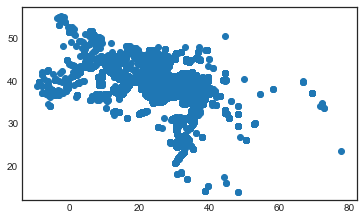

In [70]:
GIST.plot()